# Identificación y visualización de ataques de ciberseguridad
**Autor:** Julián Darío Miranda <br>
**Tiempo de presentación del caso:** 60 minutos

## Introducción al Caso de Estudio

**Contexto de Negocio.** Usted es el experto de ciberseguridad del Federal Statistical System de Estados Unidos (FSS), una entidad homóloga al Departamento Administrativo Nacional de Estadísticas (DANE) de Colombia. En el último mes han quedado registrados sendos eventos de ciberseguridad con duraciones y patrones distintos.

**Problema de Negocio.** Usted quiere identificar <i>"¿cuáles son los ataques de ciberseguridad más comunes, los puertos lógicos más accedidos y los patrones visibles?"</i>

**Contexto Analítico** Los datos a procesar se han obtenido al agregar datos brindados por el departamento de tecnología una empresa, que incluye datos de flujo de red producidos por nueve tipos de ataques diferentes dentro de actividades de usuario cotidianas. Usando su habilidad para el análisis de datos, identifique cuáles son los ataques de ciberseguridad más comunes ocurridos en la franja de tiempo medida, los puertos lógicos más accedidos y los patrones visibles de estos ataques.

## Importando los paquetes para el análisis de los datos

Utilizaremos cuatro paquetes principales: ```pandas```, ```numpy```, ```matplotlib``` y ```seaborn```, y a biblioteca de ```scipy```. Importemos estos paquetes usando la palabra clave ```import```. Cambiaremos el nombre de ```pandas``` a ```pd```, ```numpy``` a ```np```, ```matplotlib``` a ```plt``` y ```seaborn``` a ```sns```, utilizando la palabra clave ```as```. De ```scipy``` importaremos el paquete ```stats``` que nos permite utlizar informática científica para la optimización, el álgebra lineal, la interpolación, el procesamiento de señales e imágenes y otras tareas comunes en ciencia e ingeniería que están relacionadas con la estadística computacional. E importaremos la función ```chi2_contingency``` que nos permite ejecutar pruebas estadísticas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import warnings
warnings.filterwarnings("ignore")

Vamos a leer un archivo .csv que contiene información sobre diferentes eventos de ciberseguridad que se han presentado en una fraja de tiempo determinada y han sido registrados por el Federal Statistical System de Estados Unidos (FSS). De esta forma, se tienen los siguientes atributos en los datos:

1. **Time:** fecha registrada de inicio y fin del ataque en formato *timestamp*.
2. **Attack category:** tipo de ataque informático registrado.
3. **Attack subcategory:** subcategoría del tipo de ataque informático registrado
4. **Protocol:** protocolo usado para el ataque.
5. **Source IP:** dirección IPv4 registrada de donde provino el ataque.
6. **Source Port:** puerto lógico registrado de donde provino el ataque.
7. **Destination IP:** dirección IPv4 destino registrada del ataque.
8. **Destination Port:** puerto lógico destino registrado del ataque.
9. **Attack Name:** nombre registrado para el ataque ejecutado.
10. **Attack Reference:** referencia en el Common Vulnerabilities and Exposures (CVE) del tipo de ataque registrado.

Los siguientes tipos de ataque están incluidos en el conjunto de datos:

- **Reconocimiento (Reconnaissance):** se puede definir como una sonda en la que el atacante recopila información sobre una red informática para evadir sus controles de seguridad.
- **Fuzzers:** el atacante intenta descubrir lagunas de seguridad en un programa, sistema operativo o red al alimentarlo con una entrada masiva de datos aleatorios para que se bloquee.
- **Análisis (Analysis):** un tipo de intrusión que penetra en las aplicaciones web a través de puertos (por ejemplo, escaneos de puertos), correos electrónicos (por ejemplo, correo no deseado) y scripts web (por ejemplo, archivos HTML).
- **Puerta trasera (Backdoor):** una técnica sigilosa para evitar la autenticación normal para asegurar el acceso remoto no autorizado a un dispositivo.
- **Explotación (Exploit):** una secuencia de instrucciones que aprovecha una falla o vulnerabilidad causada por un comportamiento involuntario o insospechado en un host o red.
- **Genérico (Generic):** una técnica que establece contra cada cifrado de bloque utilizando una función hash para colisión sin tener en cuenta la configuración del cifrado de bloque.
- **Shellcode:** el atacante penetra un pequeño fragmento de código a partir de un shell para controlar la máquina comprometida.
- **Gusano (Worm):** el ataque se replica para propagarse en otras computadoras. A menudo, utiliza una red informática para propagarse, dependiendo de las fallas de seguridad en la computadora de destino para acceder a ella.
- **DoS:** una intrusión que interrumpe los recursos de la computadora, a menudo a través de la memoria, para estar extremadamente ocupada para evitar que las solicitudes autorizadas accedan a un dispositivo.

Para tener una mejor idea de los datos disponibles, primero echemos un vistazo a los datos del Federal Statistical System de Estados Unidos (FSS), que se encuentran en el archivo Cybersecurity_attacks.csv. Pandas permite cargar fácilmente archivos CSV mediante el uso del método ```pd.read_csv ()```:

In [2]:
df_interest = pd.read_csv('Cybersecurity_attacks.csv')

Alternativamente, podríamos leer el conjunto de datos desde Github de la siguiente forma:

```python
url = 'https://raw.githubusercontent.com/juliandariomirandacalle/Visualization_Bootcamp/main/Cybersecurity_attacks.csv'
df_interest = pd.read_csv(url)
```

Usando ```df.head()``` y ```df.tail()``` podemos ver el contenido de los datos. A menos que se especifique de otra forma, los objetos DataFrame y Series tienen índices empezando desde 0 e incrementando monotónica e incrementalmente como enteros.

In [3]:
df_interest.head()

,Attack category,Protocol,Source IP,Source Port,Destination IP,Destination Port,Start time,Last time,Duration
0,RECONNAISSANCE,TCP,175.45.176.0,13284,149.171.126.16,80,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,EXPLOITS,UDP,175.45.176.3,21223,149.171.126.18,32780,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,EXPLOITS,TCP,175.45.176.2,23357,149.171.126.16,80,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,EXPLOITS,TCP,175.45.176.2,13792,149.171.126.16,5555,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,EXPLOITS,TCP,175.45.176.2,26939,149.171.126.10,80,2015-01-22 11:50:18,2015-01-22 11:50:18,0


In [4]:
df_interest.tail()

,Attack category,Protocol,Source IP,Source Port,Destination IP,Destination Port,Start time,Last time,Duration
174336,DOS,TCP,175.45.176.0,33654,149.171.126.12,80,2015-02-18 12:21:06,2015-02-18 12:21:09,3
174337,FUZZERS,TCP,175.45.176.3,36468,149.171.126.15,445,2015-02-18 12:21:07,2015-02-18 12:21:08,1
174338,RECONNAISSANCE,TCP,175.45.176.2,64395,149.171.126.18,111,2015-02-18 12:21:07,2015-02-18 12:21:08,1
174339,GENERIC,UDP,175.45.176.0,47439,149.171.126.10,53,2015-02-18 12:21:08,2015-02-18 12:21:08,0
174340,EXPLOITS,TCP,175.45.176.0,17293,149.171.126.17,110,2015-02-18 12:21:08,2015-02-18 12:21:09,1


Puede notarse que hay 174341 registros, cada uno con 11 datos. El tamaño del DataFrame puede ser calculado mediante el atributo ```shape```:

In [5]:
df_interest.shape

(174341, 9)

Las columnas presentes en el ```df``` son:

In [6]:
df_interest.columns

Index(['Attack category', 'Protocol', 'Source IP', 'Source Port',
       'Destination IP', 'Destination Port', 'Start time', 'Last time',
       'Duration'],
      dtype='object')

## Proceso de preparación de los datos

Primero vamos a listar cuántos datos nulos o inexistentes existen en el conjunto de datos que hemos importado. Esto se hace mediante la función ```.isnull()``` que es propia de ```pandas```. Para apreciar de una forma agregada esta información, podemos hacer uso de la función ```.sum()``` que nos permite contar aquellos datos que efectivamente hayan sido catalogados como nulos o inexistentes: 

In [7]:
df_interest.isnull().sum()

Attack category     0
Protocol            0
Source IP           0
Source Port         0
Destination IP      0
Destination Port    0
Start time          0
Last time           0
Duration            0
dtype: int64

Ya que no tenemos datos nulos o inexistentes en nuestro dataset, procedemos a verificar la existencia de filas duplicadas. Este tipo de filas no suelen ser objeto de estudio de análisis de ciencia de datos, pus normalmente representan redundancia de los datos que generan ruido en las mediciones posteriores. Para revisar cuáles columnas están duplicadas en un objeto DataFrame, se hace uso del método ```.duplicated()```, que devuelve los índices de las filas duplicadas. Con estos índices podemos proceder a filtrar el DataFrame:

In [8]:
df_interest[df_interest.duplicated()]

,Attack category,Protocol,Source IP,Source Port,Destination IP,Destination Port,Start time,Last time,Duration
55,EXPLOITS,TCP,175.45.176.0,40411,149.171.126.13,110,2015-01-22 11:51:04,2015-01-22 11:51:07,3
66,EXPLOITS,TCP,175.45.176.1,43058,149.171.126.14,110,2015-01-22 11:51:16,2015-01-22 11:51:17,1
72,EXPLOITS,TCP,175.45.176.2,40291,149.171.126.19,143,2015-01-22 11:51:21,2015-01-22 11:51:22,1
73,EXPLOITS,TCP,175.45.176.2,40291,149.171.126.19,143,2015-01-22 11:51:21,2015-01-22 11:51:22,1
100,EXPLOITS,TCP,175.45.176.2,2114,149.171.126.10,65419,2015-01-22 11:51:47,2015-01-22 11:51:48,1
...,...,...,...,...,...,...,...,...,...
174218,EXPLOITS,TCP,175.45.176.3,9103,149.171.126.17,21,2015-02-18 12:20:09,2015-02-18 12:20:10,1
174220,EXPLOITS,TCP,175.45.176.3,4349,149.171.126.17,59546,2015-02-18 12:20:10,2015-02-18 12:20:10,0
174271,EXPLOITS,TCP,175.45.176.0,10452,149.171.126.13,21,2015-02-18 12:20:41,2015-02-18 12:20:42,1
174272,EXPLOITS,TCP,175.45.176.0,6483,149.171.126.13,62660,2015-02-18 12:20:41,2015-02-18 12:20:42,1


Como vemos, existen 83,493 observaciones que se encuentran duplicadas a lo largo del conjunto de datos. Existen dos tratamientos para manejar estas columnas duplicadas:

1. **Tratamiento 1:** Ignorar las observaciones duplicadas, considerando que se trata de eventos que sucedieron en condiciones símiles y esto representa una condición normal en los datos.
4. **Tratamiento 2:** Eliminar las observaciones duplicadas con la certeza de que no se perderá información valiosa al analizar los datos, sabiendo que no es natural en el proceso el producir observaciones con las mismas características.

En este caso vamos a seguir el **Tratamiento 1**, pues se trata de eventos de ciberseguridad que pueden presentarse de forma repetitiva e incluso periodica.

# Análisis Exploratorio de Datos (Exploratory Data Analysis (EDA))

*El análisis exploratorio de datos se refiere al proceso crítico de realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos con la ayuda de estadísticas resumidas y representaciones gráficas*

## Análisis general de los ataques de ciberseguridad

Vamos a empezar nuestro EDA analizando las categorías de los ataques registrados en el conjunto de datos. Para esto, podemos hacer uso del método ```.unique()```, que nos permite extraer el espectro de valores únicos de un objeto Series:

In [9]:
df_interest['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

Ahora que sabemos qué tipos de ataques están registrados en el conjunto de datos, vamos a extraer cuántos ataques de cada tipo han sido anotados, usando el método ```.value_counts()```, que cuenta las coincidencias de cada uno de los datos en un objeto Series:

In [11]:
df_interest['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

Expresemos ahora estos valores en términos porcentuales con el fin de hacer de las cuentas, valores comparables:

In [12]:
df_interest['Attack category'].value_counts()*100/df_interest['Attack category'].value_counts().sum()

EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

Podemos evidenciar que los valores se encuentran ordenados de mayor a menor porcentaje. Esto es porque el método ```.value_counts()``` que utilizamos ordena las cuentas de mayor a menor. Sin embargo, estos datos no nos permiten ver muy bien las diferencias, así que graficaremos los valores en un diagrama de barras usando el método de ```.barplot()``` del paquete de ```seaborn```, y los prcentajes del Top 5 en un diagrama de torta (Pie Chart), usando el método ```.plot(kind='pie')``` del paquete de ```pandas```:

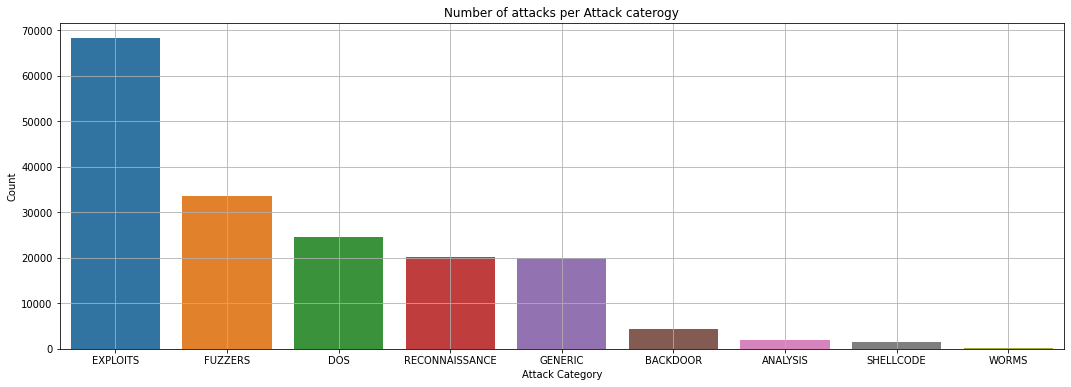

In [13]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_interest['Attack category'].value_counts().index,y=df_interest['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

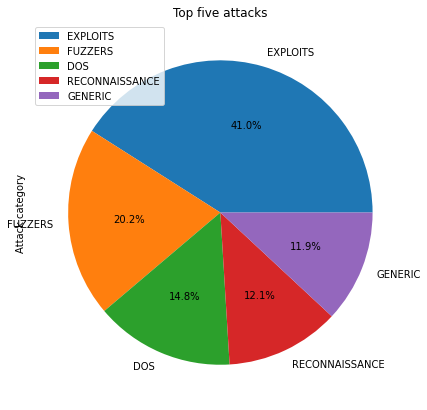

In [14]:
pd.DataFrame(df_interest['Attack category'].value_counts())[:5].plot(kind='pie', y='Attack category', figsize=(7, 7), autopct='%1.1f%%')
plt.title('Top five attacks')
plt.legend(loc='upper left')
plt.show()

Tal parece ser que la mayor cantidad de ataques son de exploits, seguido de fuzzers y ataques de Denegación de Servicios. Ahora expresemos la fecha en un formato propicio para su análisis: `datetime`.

In [16]:
df_interest['Start time'] = pd.to_datetime(df_interest['Start time'])
df_interest['Last time'] = pd.to_datetime(df_interest['Last time'])

Vamos a verificar que tengamos nuestras columnas relativas a mediciones en el tiempo, en el formato correcto:

In [17]:
df_interest.dtypes

Attack category             object
Protocol                    object
Source IP                   object
Source Port                  int64
Destination IP              object
Destination Port             int64
Start time          datetime64[ns]
Last time           datetime64[ns]
Duration                     int64
dtype: object

In [18]:
df_interest.head()

,Attack category,Protocol,Source IP,Source Port,Destination IP,Destination Port,Start time,Last time,Duration
0,RECONNAISSANCE,TCP,175.45.176.0,13284,149.171.126.16,80,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,EXPLOITS,UDP,175.45.176.3,21223,149.171.126.18,32780,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,EXPLOITS,TCP,175.45.176.2,23357,149.171.126.16,80,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,EXPLOITS,TCP,175.45.176.2,13792,149.171.126.16,5555,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,EXPLOITS,TCP,175.45.176.2,26939,149.171.126.10,80,2015-01-22 11:50:18,2015-01-22 11:50:18,0


Podemos evidenciar que el análisis que vamos a ejecutar de aquí en adelante es sobre información relativa a dos días de registros en la empresa, el jueves 22 de enero de 2015 y el miércoles 18 de febrero de 2015:

In [20]:
df_interest['Start time'].min(), df_interest['Start time'].max()

(Timestamp('2015-01-22 11:50:14'), Timestamp('2015-02-18 12:21:08'))

Con el fin de evidenciar si existe alguna relación lineal entre las variables numéricas presentes en nuestro DataFrame, vamos a ejecutar el método ```.corr()```, que calcula el coeficiente de correlación de Pearson sobre las variables. Este coeficiente está en el intervalo [-1, 1]. Entre más pegado a -1 este el valor, se dice que la relación es de débil a fuerte e inversamente proporcional, o negativa. Entre más cercano esté este coeficiente a 1, se dice que la relación es de débil a fuerte y directamente proporsional, o positiva. Si el valor es cercano a 0, no hay una relación lineal clara entre las variables.

In [23]:
df_interest.corr()

,Source Port,Destination Port,Duration
Source Port,1.000000,0.137155,-0.078024
Destination Port,0.137155,1.000000,-0.026770
Duration,-0.078024,-0.026770,1.000000


Con el fin de evidenciar visualmente estos valores de correlación, suele graficarse en un mapa de calor estos valores, haciendo uso del método ```.heatmap()``` incluido en el paquete de ```seaborn```:

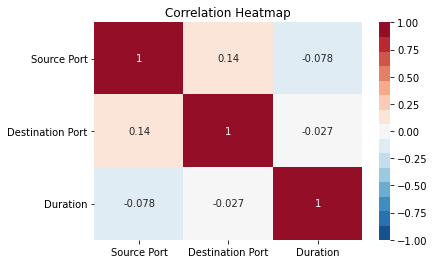

In [24]:
sns.heatmap(df_interest.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.title('Correlation Heatmap')
plt.show()

Entre más cálidos sean los colores, menos relación lineal tienen las variables graficadas. Entre más fuertes los colores de azul y rojo sean, más fuerte es la relación de proporcionalidad entre las variables evaluadas. En este caso, los colores son considerablemente cálidos, lo que indica que no hay una relación lineal visible entre las variables del conjunto de datos.

## Análisis de tiempo de ocurrencia y duración de los eventos de ciberseguridad

Vamos a analizar la IPv4 destino 149.171.126.17, haciendo una gráfica de dispersión, en donde cada ataque correspona a un punto relacionado con el puerto de destino. Esto lo haremos usando el método ```.scatterplot()``` del paquete de ```seaborn```:

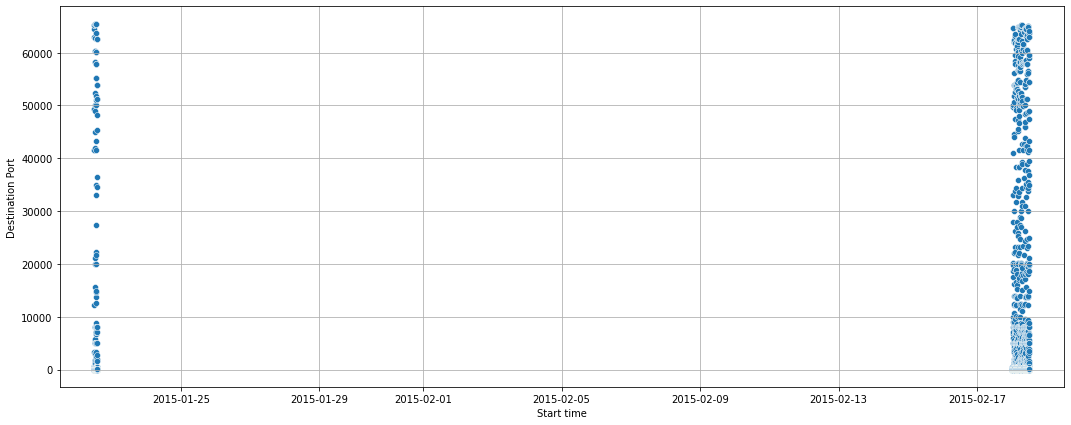

In [25]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=df_interest[df_interest['Destination IP']=='149.171.126.17']['Start time'], y=df_interest[df_interest['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=df_interest['Start time'].min()-timedelta(days=1),right=df_interest['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

Ampliemos ahora las dos franjas, tanto la izquierda, como la derecha, para visualizar si existe algún patrón de ataque y los puertos que fueron atacados. Esto podemos hacerlo especificando el límite del eje *x*, mediante la función ```.xlim()``` de ```matplotlib.pyplot```, conociendo de antemano la franja a la que queremos hacer un acercamiento:

**Zona izquierda:**

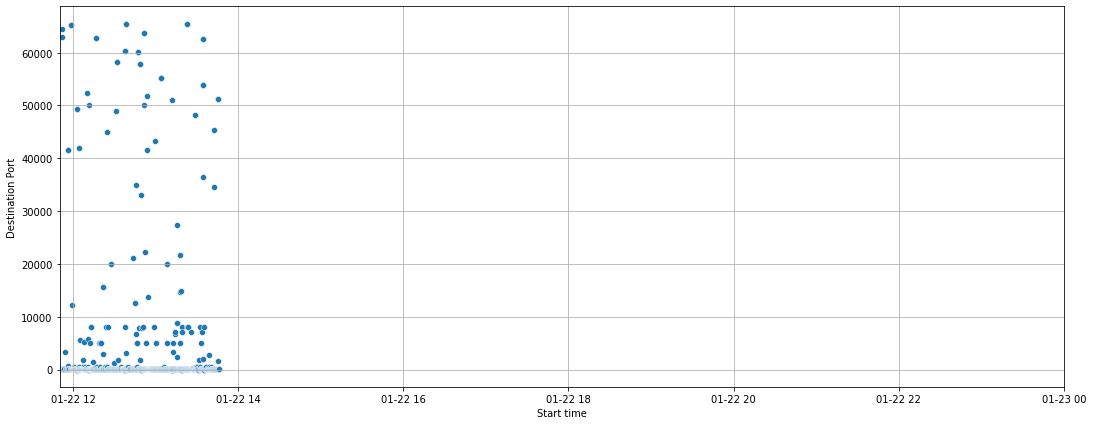

In [26]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=df_interest[df_interest['Destination IP']=='149.171.126.17']['Start time'], y=df_interest[df_interest['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=df_interest['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()

**Zona derecha:**

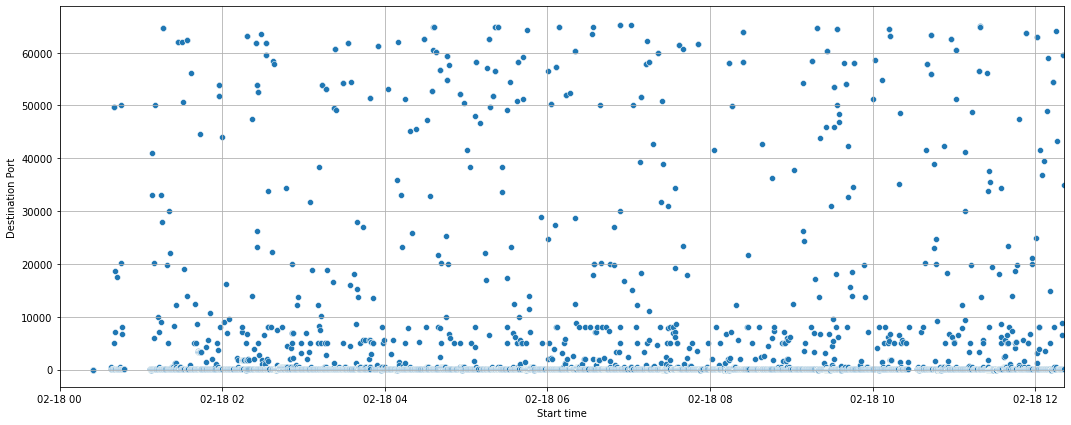

In [27]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=df_interest[df_interest['Destination IP']=='149.171.126.17']['Start time'], y=df_interest[df_interest['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=df_interest['Start time'].max())
plt.grid(True)
plt.show()

Hemos visto que existe una dispersión alta en los datos y no parece verse un patrón aparente. Sin embargo, hagamos un acercamiento al diagrama de dispersión cuando los ataques fueron ejecutados a los primeros 150 puertos, filtrando con una condición adicional en ```[]``` sobre la columna de ```Destination Port``` y discriminando en la gráfica por tipo de ataque. Esto puede hacerse usando el parámetro ```hue```, que hace una discriminación por colores de una tercera variable en la graficación:

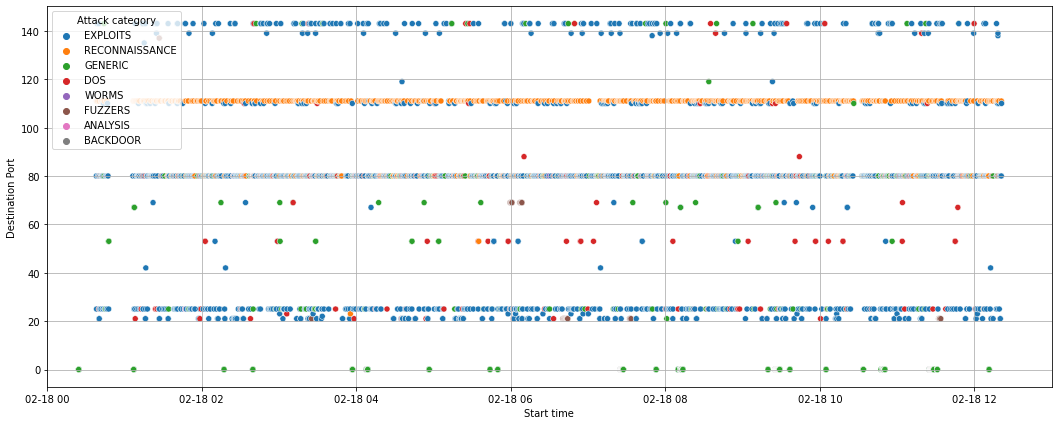

In [28]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', data=df_interest[(df_interest['Destination IP']=='149.171.126.17')&(df_interest['Destination Port']<=150)])
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

¿Identificamos algún patrón en la gráfica? ¿A qué se debe este patronamiento, si existe?

También podemos graficar la dispersión de la duración de los eventos de ciberseguridad en términos del puerto de destino. Puede observarse que para los puertos más bajos, dentro de los que hacen parte los puertos bien conocidos, a duración registrada de los ataques aciende hasta un minuto; mientras que, a medida que vamos creciendo en el número de puerto, la duración del evento tiende a decrecer. Aunque no es una tendencia linea, como lo habíamos visto en la matriz de correlación, existe un patrón que identifica su comportamiento en el tiempo.

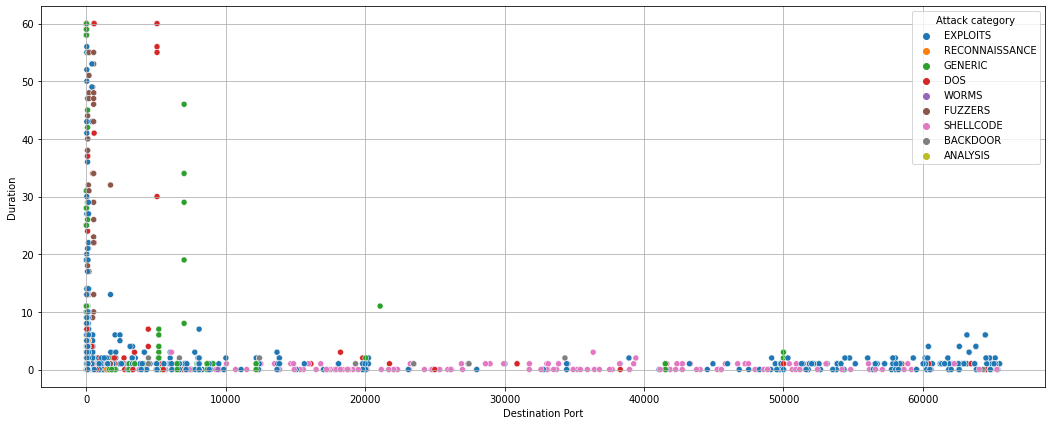

In [29]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category', data=df_interest[df_interest['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

La distribución de la duración de los eventos respecto al tipo de ataque puede verse en un diagrama de violín (*violin plot*). Este diagrama puede graficarse usando el método de ```.violinplot()``` de la librería ```seaborn```. Puede notarse que hay dos tipos de ataques que no registran tiempos mayores a 20 segundos, los *shellcode* y los *worms*. La mayoría de distribuciones son **distribuciones normales**, salvo por la encontrada en *shellcode*, que posee dos picos, indicando que se trata de una **distribución bimodal** en la que pueden presentarse valores de duración con casi igual probabilidad de ocurrencia.

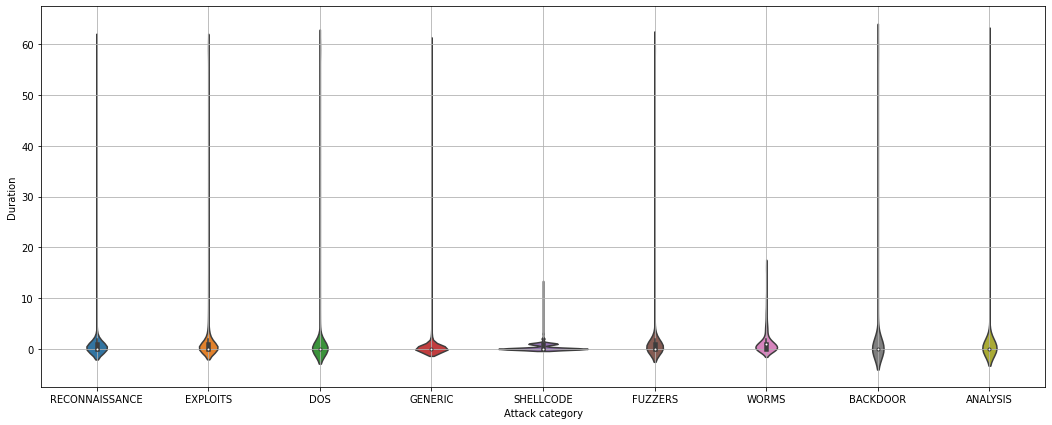

In [30]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attack category', y='Duration', data=df_interest, showfliers = False)
plt.grid(True)
plt.show()

Al agregar los datos de duración de eventos del conjunto de datos, se puede hacer uso de una gráfica de distribución de probabilidad generalizada para describir los datos, mediante el método ```.distplot()``` del paquete ```seaborn```:

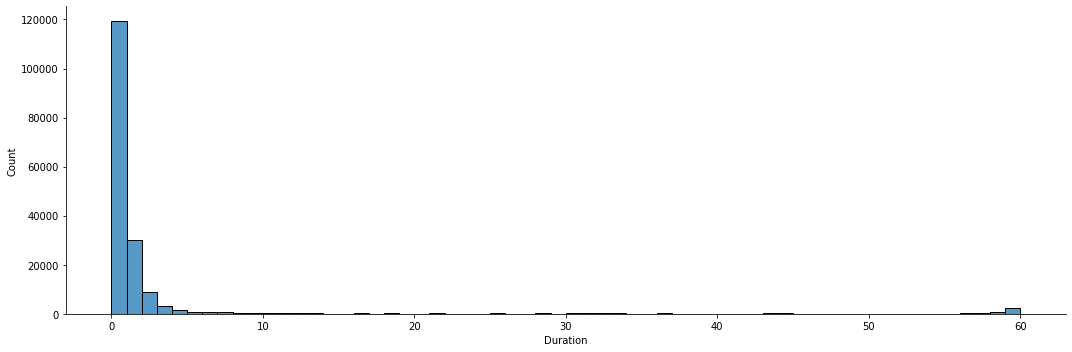

In [47]:
sns.displot(df_interest['Duration'], bins = 60, height=5, aspect=3)
plt.show()

Para ver el comportamiento particularizado de la duración de cada ataque registrado, pueden hacerse gráficas independientes en línea, usando el método ```.subplots(rows, columns)``` del paquete ```matplotlib.pyplot```, que tiene como parámetros de entrada la cantidad de filas y columnas de la matriz de gráficas. La salida es una tupla que tiene la figura y los ejes (axes) en forma matricial. Para iterar sobre los elementos de la lista de ataques, podemos utilizar el método nativo de Python ```enumerate()```, que nos mapea elementos con índices de los elementos, de tal forma que al iterar sobre los mismos, podamos reconocer tanto el elemento, como el índice en el que se encuentra.

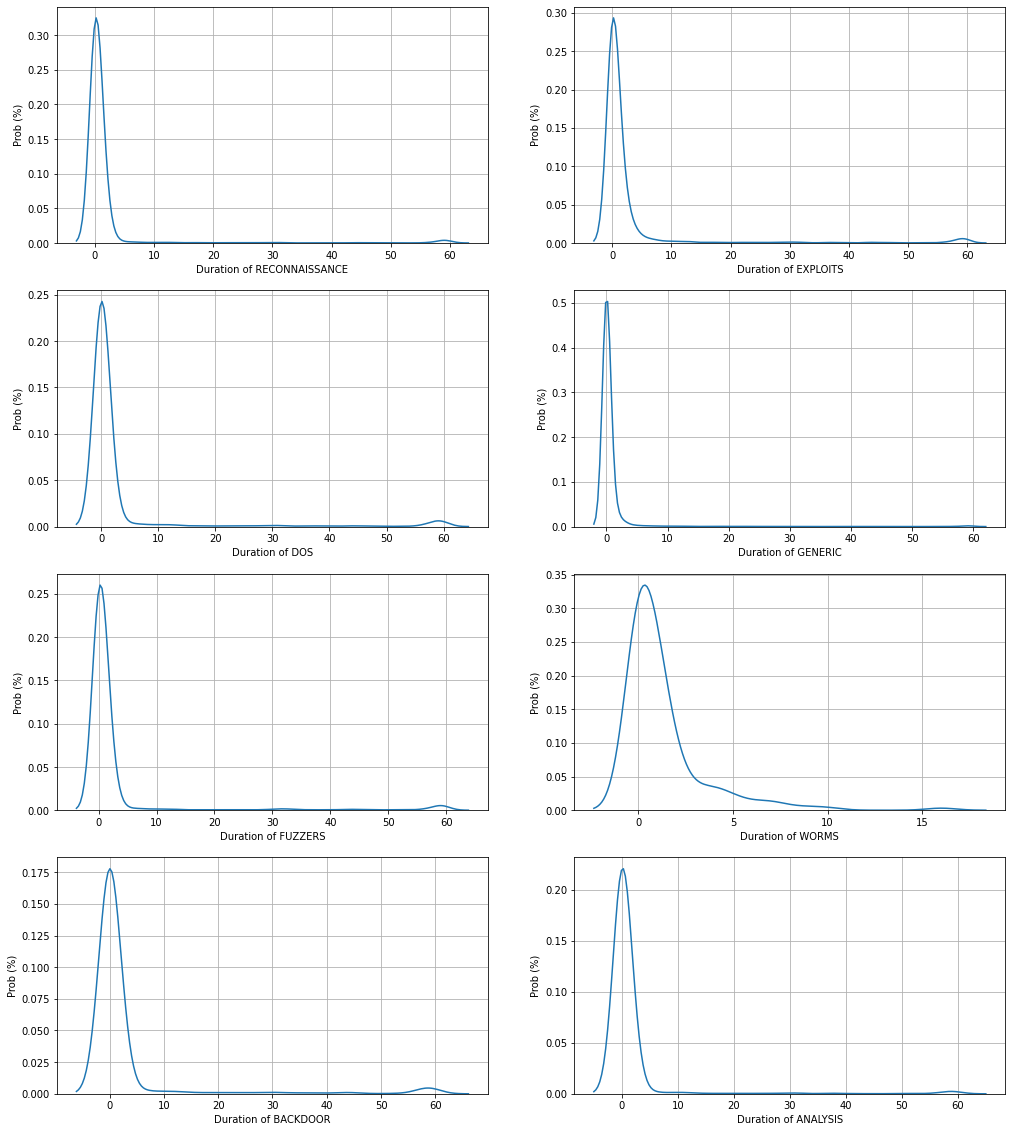

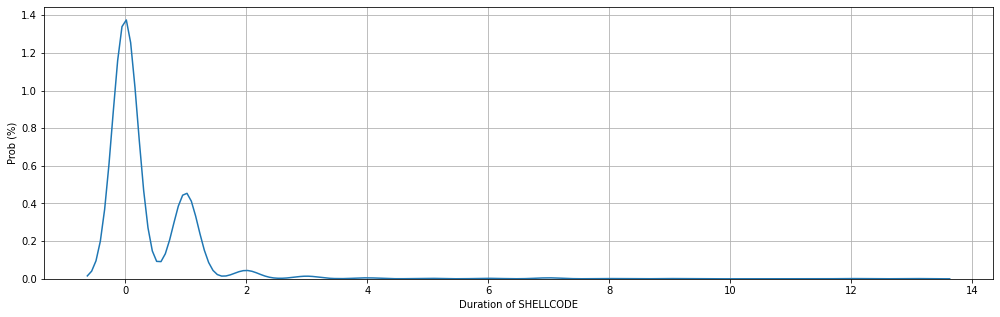

In [51]:
attacks = list(df_interest['Attack category'].unique())
attacks.remove('SHELLCODE')

f, axes = plt.subplots(math.ceil(len(attacks)/2), 2)
f.set_figheight(20)
f.set_figwidth(17)

for i, attack in enumerate(attacks):
    sns.kdeplot(df_interest[df_interest['Attack category']==attack]['Duration'], ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Duration of ' + attack)
    axes[int(i/2)][i%2].set_ylabel('Prob (%)')
    axes[int(i/2)][i%2].grid(True)

plt.figure(figsize=(17,5))
sns.kdeplot(df_interest[df_interest['Attack category']=='SHELLCODE']['Duration'])
plt.grid(True)
plt.xlabel('Duration of SHELLCODE')
plt.ylabel('Prob (%)')
plt.show()

Veamos esta distribución de la duración de los eventos en un gráfico de categorías usando la función `catplot`. Para el graficar la duración, usaremos una máscara que nos permite especificar en protocolos TCP y UDP, sobre las primeras 1000 observaciones (por practicidad y limitaciones computacionales):

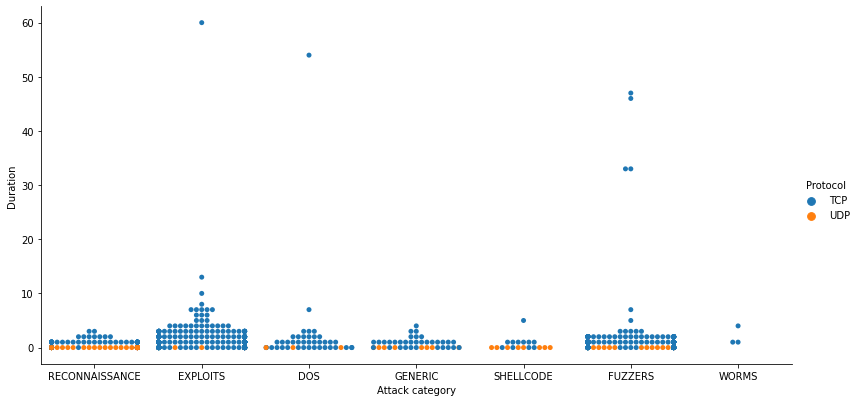

In [79]:
mask = (df_interest['Protocol'] == 'TCP') | (df_interest['Protocol'] == 'UDP')
sns.catplot(data=df_interest[mask].iloc[:1000], kind="swarm", x="Attack category", y="Duration", hue="Protocol", height=5.5, aspect=2)
plt.show()

Tal como puede notarse, la duración de los eventos tiene una distribución normal que tiene asimétria positiva, es decir, cuya 'cola' se encuentra tendida hacia la derecha. Esto significa que en más del 80% de los casos, la duración de los eventos de ciberseguridad analizados a nivel general será de menos de 10 segundos.

Ahora vamos a identificar si existe alguna relación entre la hora en la que se ejecutaron los ataques, con el tipo de ataque. Para esto, la primera tarea es hacer **Data Augmentation**, creando una nueva columna relacionada con la hora exacta en la que se realiza el ataque ```hour```. Para esto, vamos a usar el método ```.apply()``` y la función ```lambda```. Esto nos permite ejecutar una operación propia para cada una de las filas del conjunto de datos. En este caso, expresaremos la hora de ataque con el formato ```hh:00:00```, siendo ```hh``` la hora de ataque:

In [52]:
df_interest_pivot = df_interest.copy()
df_interest_pivot['hour'] = df_interest_pivot.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

Vamos a definir una función que nos permita graficar mapas de calor de una forma ordenada y sistemática. Esto podemos hacerlo en Python con la palabra reservada ```def```. Una función es un conjunto de operaciones que pueden ejecutarse al ser llamadas, teniendo datos de entrada y datos de salida. Auqí, definiremos una función de nombre ```heatmap_graph```, que tenga cuatro argumentos de entrada: ```df```(objeto DataFrame), ```xlabel``` (etiqueta del eje x), ```ylabel``` (etiqueta del eje y) y ```title``` (título del gráfico). La función no retornará resultados, simplemente ejeccutara las operaciones que se encuentran en su interior cuando sea llamada. Al interior de la función, graficaremos el mapa de calor usando nuevamente el método de ```.heatmap()``` y rotaremos las etiquetas del eje x usando el método de ```.xticks(rotatio=90)```.

In [53]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

Para contar la cantidad de ataques que suceden por hora y según el tipo de ataque, podemos construir una serie de ciclos que iteren sobre las filas y vayan almacenando en unos diccionarios la cantidad de ataques, según corresponda. Sin embargo, ```pandas``` tiene un método llamado ```.pivot_table()```, que nos permite re-estructurar el objeto DataFrame con una función de agregación determinada. En este caso, usaremos la función de agregación ```aggfunc='count'```, que denota un conteo de los ataques.

In [55]:
df_p1 = pd.pivot_table(df_interest_pivot, 
                           values='Protocol', 
                           index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category,ANALYSIS,BACKDOOR,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
hour,,,,,,,,,
00:00:00,3,16,127,543,391,60,177,20,3
01:00:00,186,1148,2640,6716,4477,1748,1804,105,14
02:00:00,71,100,630,2861,1983,1031,1023,113,10
03:00:00,226,60,3755,9759,2743,1513,2727,113,17
04:00:00,64,87,617,2776,2090,1349,1034,115,10
05:00:00,198,645,3038,9368,2536,1834,1750,111,15
06:00:00,84,90,637,2968,2065,994,1010,116,9
07:00:00,179,578,3390,6151,2413,2076,1846,116,15
08:00:00,73,111,664,2938,2048,1081,1010,107,11


En el nuevo objeto DataFrame, las columnas ahora corresponen con el tipo de ataque y las filas con la hora. Cada uno de los valores que se encuentran almacenados en el DataFrame hacen referencia a la cantidad de ataques por tipo de ataque y hora. Ahora vamos a graficar el mapa de calor llamando a la función ```heatmap_graph``` que hemos creado: 

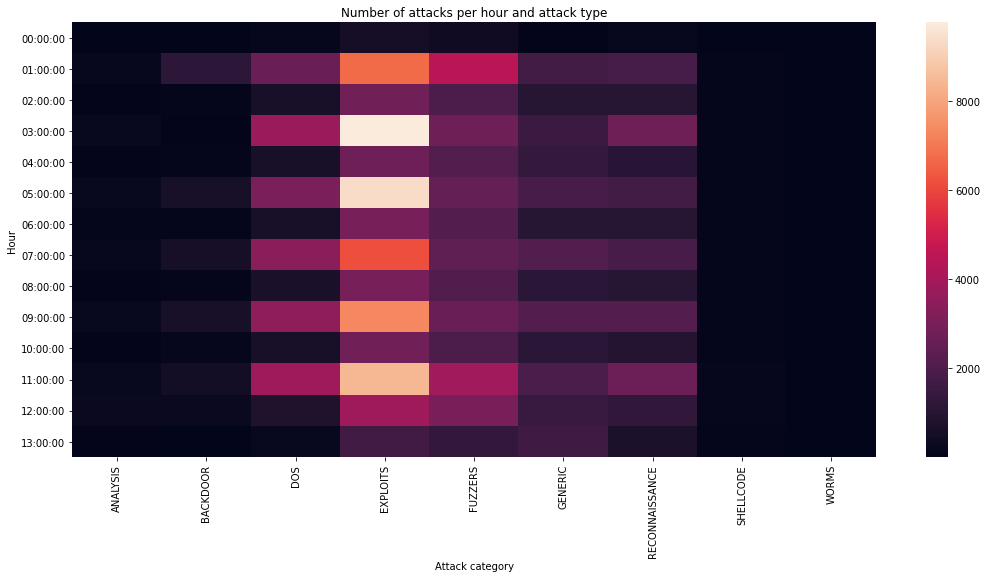

In [56]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')

Podemos notar un patrón peculiar en el proceso para cada tipo de ataque, en especial para los ataques por Denegación de Servicios y Exploits: los ataques se hicieron con más intensidad en horas impares a lo largo de la franja diurna. Vamos a hacer un segundo mapa de calor que relacione el número de ataques de ciberseguridad, con las direcciones IPv4 de destino y la hora de ataque, con el fin de evidenciar a cuáles servidores fueron dirigidos estos ataques:

In [57]:
df_interest_pivot['Destination IP'].unique()

array(['149.171.126.16', '149.171.126.18', '149.171.126.10',
       '149.171.126.15', '149.171.126.14', '149.171.126.12',
       '149.171.126.13', '149.171.126.11', '149.171.126.17',
       '149.171.126.19'], dtype=object)

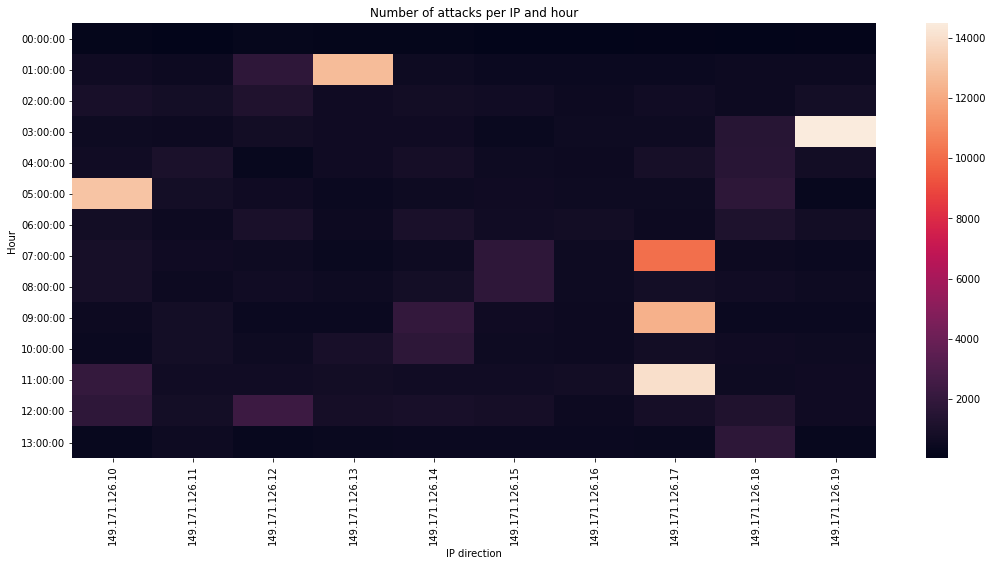

In [58]:
df_p2 = pd.pivot_table(df_interest_pivot, 
                           values='Protocol', 
                           index=['hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2, xlabel = 'IP direction', ylabel = 'Hour', title = 'Number of attacks per IP and hour')

Aunque son más de 140.000 registros relativos a ataques de ciberseguridad, estos ataques se enfocan sobre 10 servidores con direcciones IPv4 entre el intervalo [149.171.126.10, 149.171.126.19]. Esto quiere decir que la empresa fue atacada en múltiples ocasiones durante los dos días de registro, a una subred puntual, lo que denota una sucesión de eventos no casual y dirigida. 

## Análisis de puertos lógicos

Ahora vamos a analizar el comportamiento de los puertos lógicos origen y destino durante los ataques informáticos. Miremos de nuevo las estadísticas básicas de estos puerdos con el método ```.describe()```:

In [59]:
df_interest.describe()

,Source Port,Destination Port,Duration
count,174341.000000,174341.000000,174341.000000
mean,15391.130382,1304.599423,2.341572
std,21707.824000,7466.035607,9.309381
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,31862.000000,80.000000,1.000000
max,65535.000000,65535.000000,60.000000


El `tipo de ataque` y el `puerto de destino` parecen no ser independientes. Para ver esta relación gráficamente, podemos hacer inicialmente un diagrama de dispersión usando el método ```.scatterplot()``` entre los puertos de origen y destino, en términos del tipo de ataque:

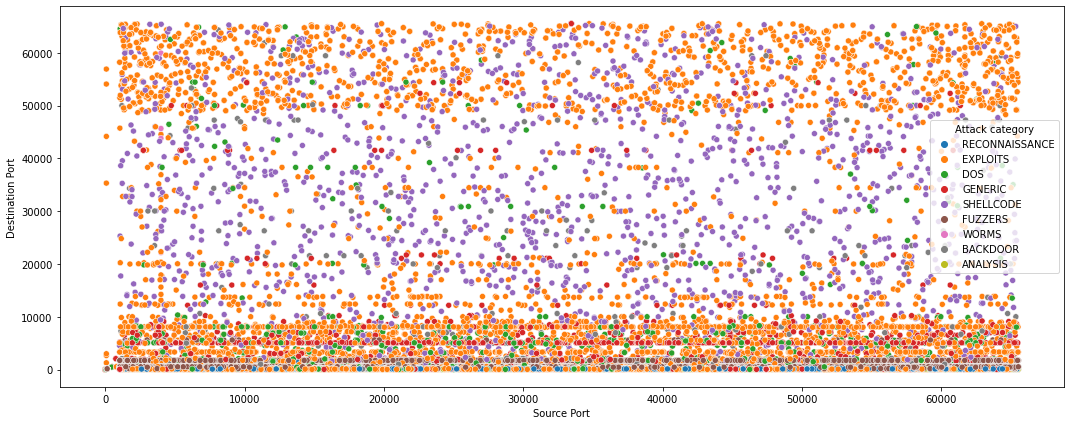

In [60]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port',y='Destination Port', hue='Attack category',data=df_interest)
plt.show()

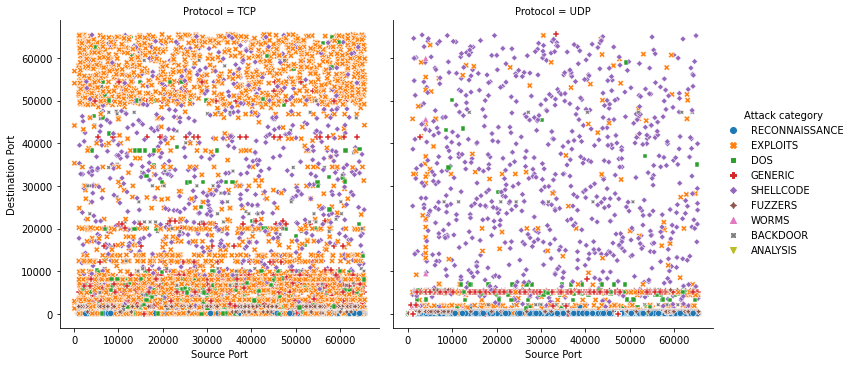

In [67]:
mask = (df_interest['Protocol'] == 'TCP') | (df_interest['Protocol'] == 'UDP')
sns.relplot(
    data=df_interest[mask],
    x="Source Port", y="Destination Port", col="Protocol",
    hue="Attack category", style="Attack category",
)
plt.show()

Puede notarse cierto patrón en la gráfica, en el que los ataques suelen ocurrir sobre puertos inferiores al 10.000 o superiores al 50.000, exceptuando los ataques de tipo shellcode, tal como habíamos anticipado en la prueba de hipótesis.

Para ver esta relación más a profundidad, podemos hacer un diagrama de tiras mediante el método ```.stripplot()``` de la distribución de los uertos lógicos de origen y de destino, en términos del tio de ataque efectuado:

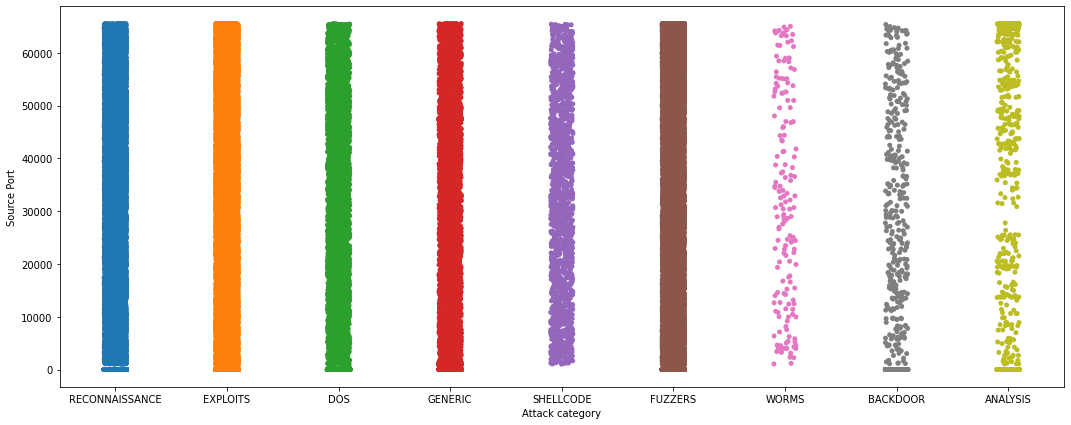

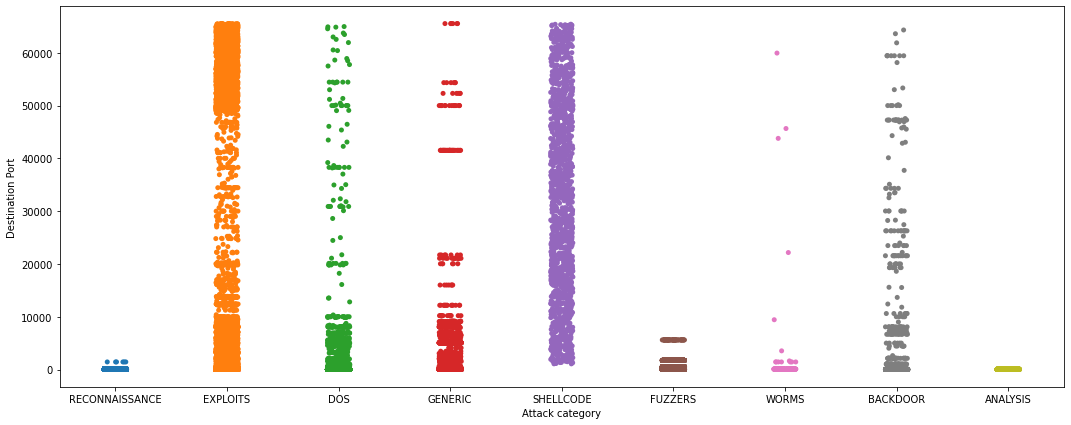

In [61]:
# Puertos de Origen
plt.figure(figsize=(18,7))
sns.stripplot(x='Attack category',y='Source Port',data=df_interest)
plt.show()

# Puertos de Destino
plt.figure(figsize=(18,7))
sns.stripplot(x='Attack category',y='Destination Port',data=df_interest)
plt.show()

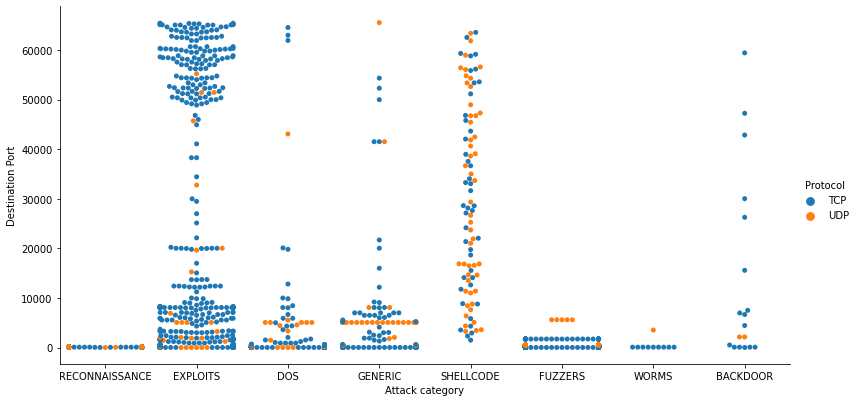

In [81]:
mask = (df_interest['Protocol'] == 'TCP') | (df_interest['Protocol'] == 'UDP')
sns.catplot(data=df_interest[mask].iloc[:5000], kind="swarm", x="Attack category", y="Destination Port", hue="Protocol", height=5.5, aspect=2)
plt.show()

## Conclusiones y aprendizaje del caso

En este caso, hemos aprendido a:
- Trabajar con el paquete ```pandas``` de Python, extrayendo datos útiles para el análisis de información que pueda dar indicios de eventos específicos de la ciberseguridad.
- Graficar los datos en mútiples gráficos usando el paquete de ```seaborn```.
- Interpretar los resultados numéricos y gráficos.
- Ejecutar pruebas de hipótesis para validar diferencias estadísticamente significativas entre medias de múltiples variables. 

Habiendo graficado y analizado los datos pudimos identificar el patronamiento de diversos tipos de ataques informáticos, relacionando su comportamiento en el tiempo, en duración y en la distribución de puertos de origen y destino. El procedimiento aquí explicado puede ser extrapolado para todo tipo de estudio de ciberseguridad en el que se tengan registros de datos ataques de ciberseguridad, lo que puede brindar gran información sobre qué patrones ocurren y cómo hacer un aseguramiento efectivo de los servicios y servidores.

## Recursos para explorar
- Introducción a la visualización de datos con Seaborn: https://seaborn.pydata.org/introduction.html
- Galería de ejemplos de visualización de datos de Seaborn: https://seaborn.pydata.org/examples/index.html
- Galería de ejemplos de visualización de datos de Matplotlib: https://matplotlib.org/stable/gallery/index.html
- Galería de ejemplos de visualización de datos de Plotly: https://dash-gallery.plotly.host/Portal/